In [111]:
import pickle
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.datasets as DT
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, roc_curve
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler

In [112]:
#Utilização do GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### função auxiliar para visualizar matrizes de confusão

In [113]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig=plt.figure(figsize=(6.5,6.5))
    plt.imshow(cm, interpolation='none', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,ha='right')
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

In [114]:
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()

In [115]:
classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [116]:
Xtrain.shape

(60000, 28, 28)

In [117]:
ytrain.shape

(60000,)

<hr style="border:2px solid black"> </hr>

### Exibir uma imagem

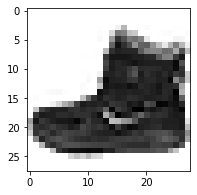

In [118]:
plt.figure(figsize=(3,3))
plt.imshow(Xtrain[0],cmap='binary')

### Mostrar imagens por classe

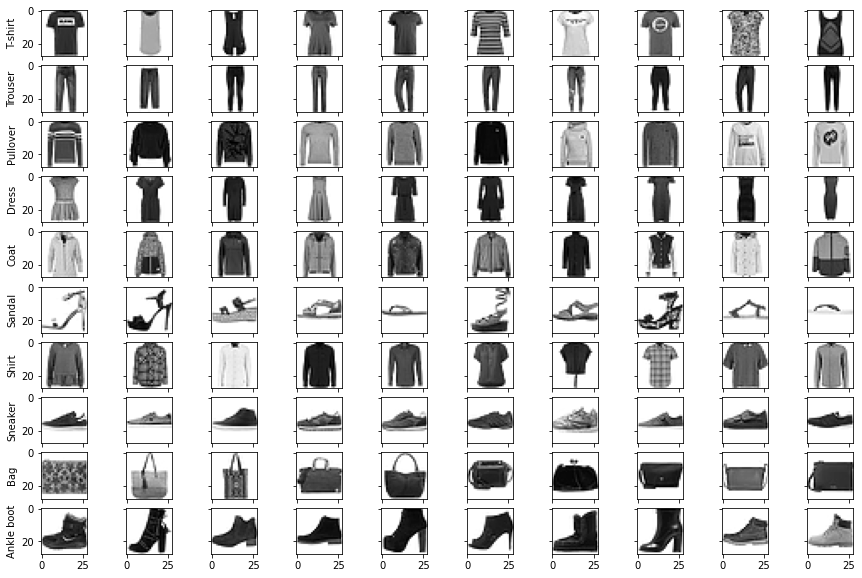

In [119]:
#Subplot para 10 imagens para cada classe
fig, subs = plt.subplots(nrows=10, ncols=10, figsize=(15, 10),squeeze=True)

idxList=[]
for i in range(10):
    idxTemp=np.argwhere(ytrain==i).squeeze()
    idxList.append(idxTemp)

    
for i in range(10):
    idx=idxList[i]    
    for n in range(10):
        Img= Xtrain[idx[n]]
        subs[i, n].set(ylabel=str(classes[i]))
        subs[i,n].label_outer()
        iplt = subs[i, n]
        iplt.imshow(Img,cmap='binary')

<hr style="border:2px solid black"> </hr>

### Reshape dos dados

In [120]:
Xtrain=Xtrain.reshape((Xtrain.shape[0],Xtrain.shape[1]**2*1))*1. #reshape e converter para float
Xtest=Xtest.reshape((Xtest.shape[0],Xtest.shape[1]**2*1))*1. #reshape e converter para float
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


### Shuffle dos dados

In [121]:
idx=rd.permutation(Xtrain.shape[0])
Xtrain=Xtrain[idx]*1.#/255-.5#Normalization
ytrain=ytrain[idx]

idx=rd.permutation(Xtest.shape[0])
ytest=ytest[idx]
Xtest=Xtest[idx]*1.#/255-.5#Normalization

### Categorizar os dados

A partir do método to_categorical() do keras é possível realizar one-hot-enconding, que é uma representação de variáveis categóricas como vectores binários.

In [122]:
ytrain_c=keras.utils.to_categorical(ytrain)
ytest_c =keras.utils.to_categorical(ytest)

<hr style="border:2px solid black"> </hr>

## Criação do modelo

In [123]:
mlp=keras.Sequential()

mlp.add(keras.layers.Dense(1000, input_shape=(784,), activation="relu"))
mlp.add(keras.layers.Normalization(mean=128,variance=128))
mlp.add(keras.layers.Dense(1000, activation="relu"))
mlp.add(keras.layers.Dense(505, activation="relu"))
mlp.add(keras.layers.Dense(505, activation="relu"))
mlp.add(keras.layers.Dense(505, activation="relu"))
mlp.add(keras.layers.Dense(505, activation="relu"))

mlp.add(keras.layers.Dense(10, activation="softmax"))
mlp.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 1000)              785000    
                                                                 
 normalization_9 (Normalizat  (None, 1000)             0         
 ion)                                                            
                                                                 
 dense_72 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_73 (Dense)            (None, 505)               505505    
                                                                 
 dense_74 (Dense)            (None, 505)               255530    
                                                                 
 dense_75 (Dense)            (None, 505)               255530    
                                                     

In [124]:
mlp.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

train = mlp.fit(Xtrain, ytrain_c, epochs=100, batch_size=1024, validation_data=(Xtest, ytest_c))

Epoch 1/100
59/59 [==============================] - 3s 25ms/step - loss: 1.8561 - accuracy: 0.6194 - val_loss: 0.6181 - val_accuracy: 0.7433
Epoch 2/100
59/59 [==============================] - 1s 20ms/step - loss: 0.5173 - accuracy: 0.8056 - val_loss: 0.5896 - val_accuracy: 0.7828
Epoch 3/100
59/59 [==============================] - 1s 20ms/step - loss: 0.4374 - accuracy: 0.8350 - val_loss: 0.4878 - val_accuracy: 0.8224
Epoch 4/100
59/59 [==============================] - 1s 20ms/step - loss: 0.3928 - accuracy: 0.8516 - val_loss: 0.4711 - val_accuracy: 0.8299
Epoch 5/100
59/59 [==============================] - 1s 19ms/step - loss: 4.6147 - accuracy: 0.5990 - val_loss: 2.1531 - val_accuracy: 0.1773
Epoch 6/100
59/59 [==============================] - 1s 19ms/step - loss: 1.2914 - accuracy: 0.5168 - val_loss: 0.9060 - val_accuracy: 0.6369
Epoch 7/100
59/59 [==============================] - 1s 19ms/step - loss: 0.6407 - accuracy: 0.7489 - val_loss: 0.5589 - val_accuracy: 0.7867
Epoch 

<hr style="border:2px solid black"> </hr>

Foi criada a seguinte função para avaliar o desempenho da rede, obtendo o score para o treino e para o teste.

In [125]:
def evaluate(mlp,Xtrain, Xtest,ytest,ytrain):
    #y teste estimado
    y_test_e=mlp.predict(Xtest)
    y_test_e=np.argmax(y_test_e,axis=1)

    #y treino estimado
    y_train_e=mlp.predict(Xtrain)
    y_train_e=np.argmax(y_train_e,axis=1)
    
    ytest=ytest.flatten()
    conf_mat= confusion_matrix(ytest,y_test_e)
    plot_confusion_matrix(conf_mat,classes)
    print('Total numb errors test:',np.sum(ytest!=y_test_e))
    print('Percentage of errors test:', ((np.sum(ytest!=y_test_e))/ytest.shape[0]*100))
    print(skm.classification_report(ytest,y_test_e))
    
    ytrain=ytrain.flatten()
    conf_mat= confusion_matrix(ytrain,y_train_e)
    plot_confusion_matrix(conf_mat,classes)
    print('Total numb errors train:',np.sum(ytrain!=y_train_e))
    print('Percentage of errors train:', ((np.sum(ytrain!=y_train_e))/ytrain.shape[0]*100))
    
    print(skm.classification_report(ytrain,y_train_e))
    

A seguinte função permite visualizar a evolução da rede ao longo das iterações de treino.

Confusion matrix, without normalization
Total numb errors test: 1175
Percentage of errors test: 11.75
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.81      0.80      1000
           3       0.94      0.82      0.87      1000
           4       0.73      0.87      0.79      1000
           5       0.98      0.95      0.97      1000
           6       0.73      0.67      0.70      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

Confusion matrix, without normalization
Total numb errors train: 2533
Percentage of errors train: 4.221666666666667
              precision

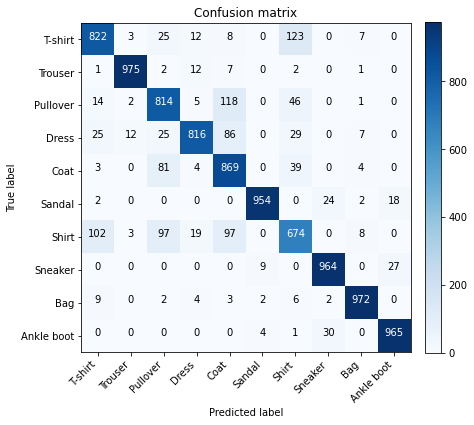

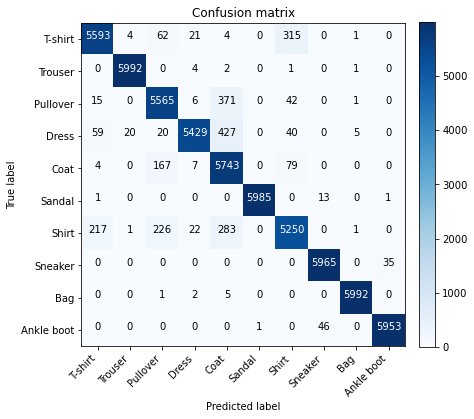

In [126]:
evaluate(mlp, Xtrain, Xtest,ytest,ytrain)